Name: Parth Vashisht
Roll no.: 102103776
3COE27

+------------------+---------+---------+--------+--------+--------+--------+--------+--------+--------+--------+
| Threads          | T=1     | T=2     | T=3    | T=4    | T=5    | T=6    | T=7    | T=8    | T=9    | T=10   |
+------------------+---------+---------+--------+--------+--------+--------+--------+--------+--------+--------+
| Time taken (sec) | 17.2586 | 13.0591 | 7.0808 | 7.8347 | 8.0081 | 6.8748 | 8.2514 | 6.5898 | 8.1541 | 6.5668 |
+------------------+---------+---------+--------+--------+--------+--------+--------+--------+--------+--------+


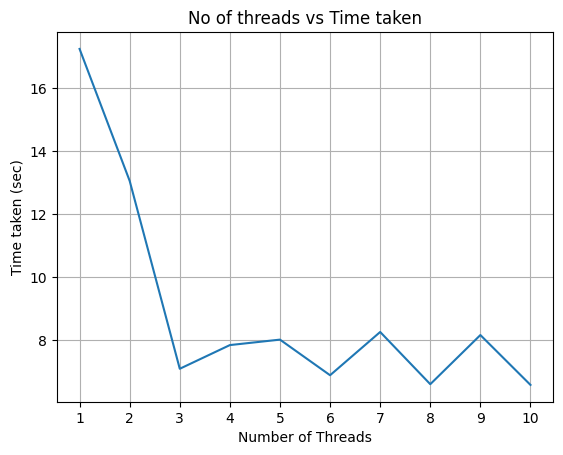

In [1]:
import numpy as np
import threading
import time
from tabulate import tabulate
import matplotlib.pyplot as plt

def mat_mul(A, B, nres, index):
    nres[index] = np.dot(A, B)

def runthreads(noofthreads):
    start_time = time.time()
    threads = []
    for i, matrix in enumerate(matrices):
        thread = threading.Thread(target=mat_mul, args=(A, matrix, nress, i))
        threads.append(thread)
        thread.start()
    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time

A = np.random.rand(1000, 1000)

nress = [None] * 100

matrices = [np.random.rand(1000, 1000) for _ in range(100)]

nress_table = []
noofthreads=list(range(1,11))
time_taken=[]
for num_t in noofthreads:
    ttime= runthreads(num_t)
    time_taken.append(ttime)
    nress_table.append(("T="+str(num_t), round(ttime,4)))

ans = list(zip(*nress_table))

print(tabulate(ans,tablefmt="grid", showindex=["Threads", "Time taken (sec)"]))

plt.plot(noofthreads, time_taken)
plt.xlabel('Number of Threads')
plt.ylabel('Time taken (sec)')
plt.title('No of threads vs Time taken')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()
